数据已筛选，只显示最近 30 天的记录。
图表已成功保存至: E:\code\Jupyter_study\股票画图\output\股票涨跌幅热力图_最近30天.png


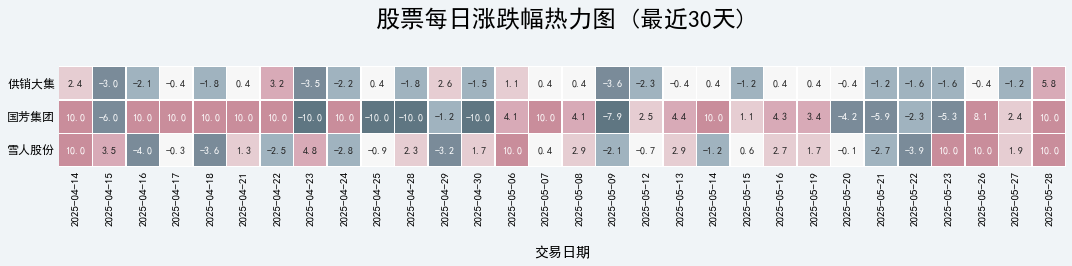

In [1]:
import pandas as pd_yxl
import seaborn as sns_yxl
import matplotlib.pyplot as plt_yxl
import matplotlib.colors as mcolors_yxl
import os as os_yxl
from datetime import datetime as datetime_yxl, timedelta as timedelta_yxl

# --- 确保中文字体正常显示 ---
plt_yxl.rcParams['font.sans-serif'] = ['SimHei'] # or 'Microsoft YaHei' on Windows
plt_yxl.rcParams['axes.unicode_minus'] = False

# ----------------------------------------------------
# 1. 数据整合与重塑函数 
# ----------------------------------------------------
def prepare_heatmap_data_yxl(directory_path_yxl, value_column_yxl='涨跌幅%', date_column_yxl='交易时间', name_column_yxl='证券名称', days_limit_yxl=None):
    """
    从目录加载数据，重塑为热力图格式，并可选择性地限制数据天数。
    """
    all_dfs_yxl = []
    if not os_yxl.path.exists(directory_path_yxl):
        print(f"错误：目录 '{directory_path_yxl}' 不存在。")
        return pd_yxl.DataFrame()

    supported_files_yxl = [f_yxl for f_yxl in os_yxl.listdir(directory_path_yxl) if f_yxl.endswith(('.csv', '.xls', '.xlsx'))]
    
    for filename_yxl in supported_files_yxl:
        file_path_yxl = os_yxl.path.join(directory_path_yxl, filename_yxl)
        try:
            if filename_yxl.endswith('.csv'):
                df_yxl = pd_yxl.read_csv(file_path_yxl, thousands=',')
            else:
                df_yxl = pd_yxl.read_excel(file_path_yxl)

            # 使用列表推导式检查所有必要的列是否存在
            required_cols_yxl = [name_column_yxl, date_column_yxl, value_column_yxl]
            if not all(col_yxl in df_yxl.columns for col_yxl in required_cols_yxl):
                print(f"警告: 文件 {filename_yxl} 缺少必要的列，已跳过。")
                continue

            all_dfs_yxl.append(df_yxl[[name_column_yxl, date_column_yxl, value_column_yxl]])
        except Exception as e_yxl:
            print(f"处理文件 {filename_yxl} 时发生错误: {e_yxl}")

    if not all_dfs_yxl:
        return pd_yxl.DataFrame()

    combined_df_yxl = pd_yxl.concat(all_dfs_yxl, ignore_index=True)
    combined_df_yxl[date_column_yxl] = pd_yxl.to_datetime(combined_df_yxl[date_column_yxl])
    combined_df_yxl[value_column_yxl] = pd_yxl.to_numeric(combined_df_yxl[value_column_yxl], errors='coerce')
    combined_df_yxl.dropna(inplace=True)

    heatmap_data_yxl = combined_df_yxl.pivot_table(
        index=name_column_yxl, 
        columns=date_column_yxl, 
        values=value_column_yxl
    )
    
    heatmap_data_yxl = heatmap_data_yxl.reindex(sorted(heatmap_data_yxl.columns), axis=1)

    if days_limit_yxl is not None and isinstance(days_limit_yxl, int) and days_limit_yxl > 0:
        if len(heatmap_data_yxl.columns) > days_limit_yxl:
            heatmap_data_yxl = heatmap_data_yxl.iloc[:, -days_limit_yxl:]
            print(f"数据已筛选，只显示最近 {days_limit_yxl} 天的记录。")

    return heatmap_data_yxl

# ----------------------------------------------------
# 2. 主绘图与保存逻辑
# ----------------------------------------------------
# --- 参数设置 ---
DATA_DIR_yxl = r'E:\code\Jupyter_study\股票画图\股票date' # 使用r''原始字符串更安全
OUTPUT_DIR_yxl = r'E:\code\Jupyter_study\股票画图\output' # 定义输出目录
VALUE_COL_yxl = '涨跌幅%'
DAYS_TO_SHOW_yxl = 30 

# 准备数据
heatmap_df_yxl = prepare_heatmap_data_yxl(DATA_DIR_yxl, value_column_yxl=VALUE_COL_yxl, days_limit_yxl=DAYS_TO_SHOW_yxl)

if heatmap_df_yxl.empty:
    print("未能生成热力图数据，程序退出。")
else:
    # --- 美学设置 ---
    fig_width_yxl = max(15, len(heatmap_df_yxl.columns) * 0.45)
    fig_height_yxl = max(6, len(heatmap_df_yxl.index) * 0.8)
    
    fig_yxl, ax_yxl = plt_yxl.subplots(figsize=(fig_width_yxl, fig_height_yxl), facecolor='#f0f4f7')
    fig_yxl.patch.set_facecolor('#f0f4f7')
    ax_yxl.set_facecolor('#f0f4f7')

    # --- 颜色和边界设置 ---
    bounds_yxl = [-float('inf'), -7, -3, -1, 1, 3, 7, float('inf')]
    colors_yxl = ['#5f7682', '#7a8b99', '#a0b3bf', '#f7f7f7', '#e6cdd2', '#d8aab7', '#c98d9b']
    cmap_yxl = mcolors_yxl.ListedColormap(colors_yxl)
    norm_yxl = mcolors_yxl.BoundaryNorm(bounds_yxl, cmap_yxl.N)

    # --- 绘制热力图 ---
    sns_yxl.heatmap(
        heatmap_df_yxl, ax=ax_yxl, square=True, cmap=cmap_yxl, norm=norm_yxl,
        annot=True, fmt=".1f", annot_kws={"size": 10},
        linewidths=.5, linecolor='white', cbar=False
    )

    # --- 布局和细节优化 ---
    ax_yxl.set_title(f'股票每日涨跌幅热力图 (最近{DAYS_TO_SHOW_yxl}天)', fontsize=24, pad=40, fontweight='bold')
    ax_yxl.set_xlabel('交易日期', fontsize=14, labelpad=20)
    ax_yxl.set_ylabel('')
    
    x_labels_yxl = [item_yxl.get_text() for item_yxl in ax_yxl.get_xticklabels()]
    ax_yxl.set_xticklabels(
        [pd_yxl.to_datetime(d_yxl).strftime('%Y-%m-%d') for d_yxl in x_labels_yxl], 
        rotation=90, ha='center', fontsize=11
    )
    
    ax_yxl.set_yticklabels(ax_yxl.get_yticklabels(), rotation=0, fontsize=12, va='center')
    
    ax_yxl.tick_params(axis='both', which='both', length=0)
    sns_yxl.despine(left=True, bottom=True, right=True, top=True)

    plt_yxl.tight_layout()

    # --- 保存图像的功能 ---
    try:
        # 1. 确保输出目录存在，如果不存在则创建
        os_yxl.makedirs(OUTPUT_DIR_yxl, exist_ok=True)

        # 2. 创建文件名
        output_filename_yxl = f"股票涨跌幅热力图_最近{DAYS_TO_SHOW_yxl}天.png"
        save_path_yxl = os_yxl.path.join(OUTPUT_DIR_yxl, output_filename_yxl)

        # 3. 保存图像 (在show()之前调用)
        #    dpi=300 保证高清晰度
        #    bbox_inches='tight' 裁剪掉图表周围多余的空白
        plt_yxl.savefig(save_path_yxl, dpi=300, bbox_inches='tight', facecolor=fig_yxl.get_facecolor())
        
        print(f"图表已成功保存至: {save_path_yxl}")

    except Exception as e_yxl:
        print(f"保存文件时发生错误: {e_yxl}")
    
    # 最后显示图像
    plt_yxl.show()